In [36]:
import pandas_datareader
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

In [3]:
import pandas_datareader.famafrench


pandas_datareader.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [17]:
start = '1926-01-01'
ff = pandas_datareader.famafrench.FamaFrenchReader('F-F_Research_Data_Factors', freq='M', start=start).read()
ff_df = ff[0]
ff_df

C:\Users\jsullij9\AppData\Local\Temp\ipykernel_17552\3229045046.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff = pandas_datareader.famafrench.FamaFrenchReader('F-F_Research_Data_Factors', freq='M', start=start).read()
C:\Users\jsullij9\AppData\Local\Temp\ipykernel_17552\3229045046.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff = pandas_datareader.famafrench.FamaFrenchReader('F-F_Research_Data_Factors', freq='M', start=start).read()


,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,2.96,-2.56,-2.43,0.22
1926-08,2.64,-1.17,3.82,0.25
1926-09,0.36,-1.40,0.13,0.23
1926-10,-3.24,-0.09,0.70,0.32
1926-11,2.53,-0.10,-0.51,0.31
...,...,...,...,...
2024-02,5.06,-0.16,-3.54,0.42
2024-03,2.83,-2.46,4.16,0.43
2024-04,-4.67,-2.34,-0.54,0.47


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

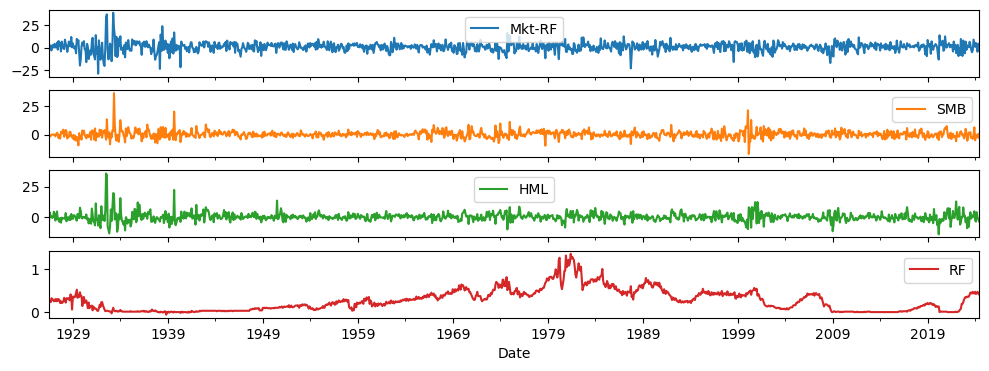

In [19]:
ff_df.plot(subplots=True, figsize=(12, 4))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

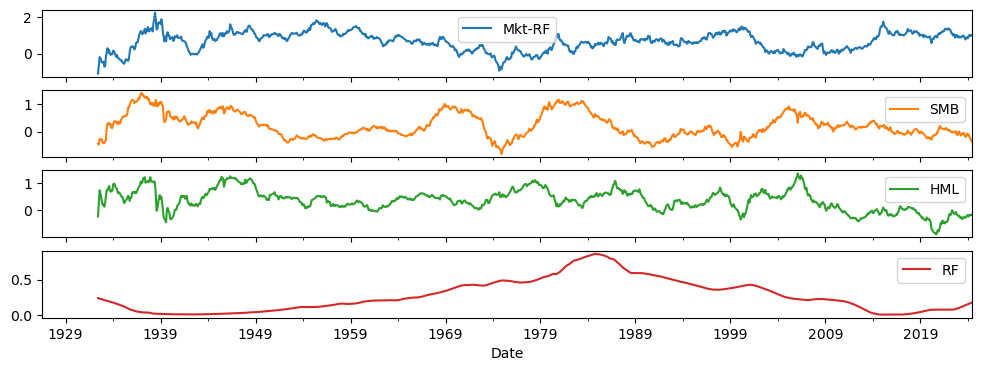

In [21]:
ff_df.rolling(window=72).mean().plot(subplots=True, figsize=(12, 4))

In [22]:
ff_mom_df = pandas_datareader.famafrench.FamaFrenchReader('F-F_Momentum_Factor', freq='M', start=start).read()[0]

C:\Users\jsullij9\AppData\Local\Temp\ipykernel_17552\1041494721.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_mom_df = pandas_datareader.famafrench.FamaFrenchReader('F-F_Momentum_Factor', freq='M', start=start).read()[0]
C:\Users\jsullij9\AppData\Local\Temp\ipykernel_17552\1041494721.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_mom_df = pandas_datareader.famafrench.FamaFrenchReader('F-F_Momentum_Factor', freq='M', start=start).read()[0]


array([<Axes: xlabel='Date'>], dtype=object)

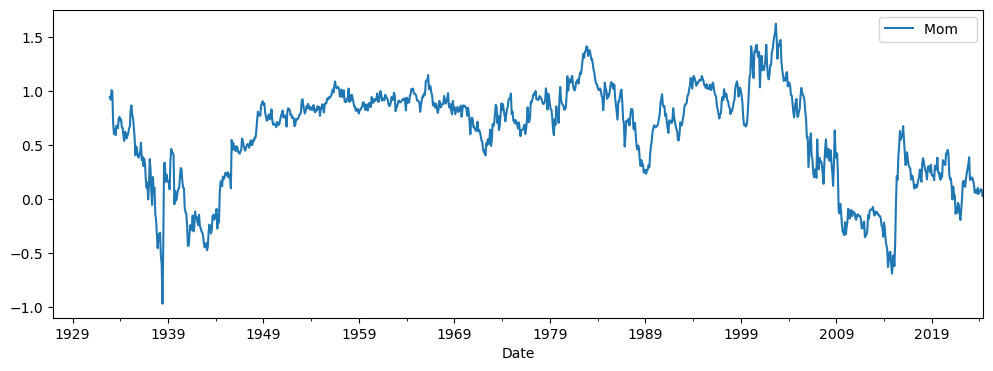

In [24]:
ff_mom_df.rolling(window=72).mean().plot(subplots=True, figsize=(12, 4))

In [33]:
ffac_merged_df = pd.merge(ff_df, ff_mom_df, left_index=True, right_index=True)
ffac_merged_df

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
1927-01,-0.06,-0.37,4.54,0.25,0.36
1927-02,4.18,0.04,2.94,0.26,-2.14
1927-03,0.13,-1.65,-2.61,0.30,3.61
1927-04,0.46,0.30,0.81,0.25,4.30
1927-05,5.44,1.53,4.73,0.30,3.00
...,...,...,...,...,...
2024-02,5.06,-0.16,-3.54,0.42,4.92
2024-03,2.83,-2.46,4.16,0.43,-0.40
2024-04,-4.67,-2.34,-0.54,0.47,-0.52


In [43]:
ticker = yf.Ticker('AAPL')
AAPL = ticker.history(period='max')['Close'].resample('M').ffill().pct_change()
AAPL

C:\Users\jsullij9\AppData\Local\Temp\ipykernel_17552\565949271.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  AAPL = ticker.history(period='max')['Close'].resample('M').ffill().pct_change()


Date
1980-12-31 00:00:00-05:00         NaN
1981-01-31 00:00:00-05:00   -0.172163
1981-02-28 00:00:00-05:00   -0.061943
1981-03-31 00:00:00-05:00   -0.075475
1981-04-30 00:00:00-04:00    0.158162
                               ...   
2024-04-30 00:00:00-04:00   -0.006706
2024-05-31 00:00:00-04:00    0.130222
2024-06-30 00:00:00-04:00    0.095553
2024-07-31 00:00:00-04:00    0.054411
2024-08-31 00:00:00-04:00   -0.055205
Freq: ME, Name: Close, Length: 525, dtype: float64